In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
%cd /content/drive/MyDrive/projet_deep_learning/

/content/drive/MyDrive/projet_deep_learning


# **Loading images**

In [49]:
import cv2, os
import numpy as np

data_path='./Data_Fragment'
data_list=os.listdir(data_path)
img_data=[]

for dataset in data_list:
  img_list=os.listdir(data_path+'/'+dataset)
  print("loading all the images from the folder -{}\n".format(dataset))
  for img in img_list:
    input_img=cv2.imread(data_path+'/'+dataset+'/'+img)
    input_img_resized=cv2.resize(input_img,(48,48))
    img_data.append(input_img_resized)

data=np.array(img_data)
data=data.astype('float32')
data=data/255.0
data.shape


loading all the images from the folder -anger

loading all the images from the folder -happy

loading all the images from the folder -contempt

loading all the images from the folder -disgust

loading all the images from the folder -surprise

loading all the images from the folder -sadness

loading all the images from the folder -fear



(981, 48, 48, 3)

# **Preparing the data**

In [78]:
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

num_classes=len(data_list)
num_samples=data.shape[0]

#one_hot_vector
labels=np.ones((num_samples),dtype='int64')


labels[0:135]=0 #135 (anger)
labels[135:342]=1 #207 (happy)
labels[342:396]=2 #54 (comtempt)
labels[396:573]=3 #177 (disgust)
labels[573:822]=4 #249 (surprise)
labels[822:906]=5 #84 (sadness)
labels[906:981]=6 #75 (fear)


names=data_list

img_labels=to_categorical(labels,num_classes) #Converts a class vector (integers) to binary class matrix.
img_labels
#shuffle the data
x_img,y_img=shuffle(data,img_labels,random_state=2) #Shuffle arrays or sparse matrices in a consistent way.

#prepping the data for train and test data
x_train,x_test,y_train,y_test=train_test_split(x_img,y_img,test_size=0.2,random_state=2)

**Show some samples of images**

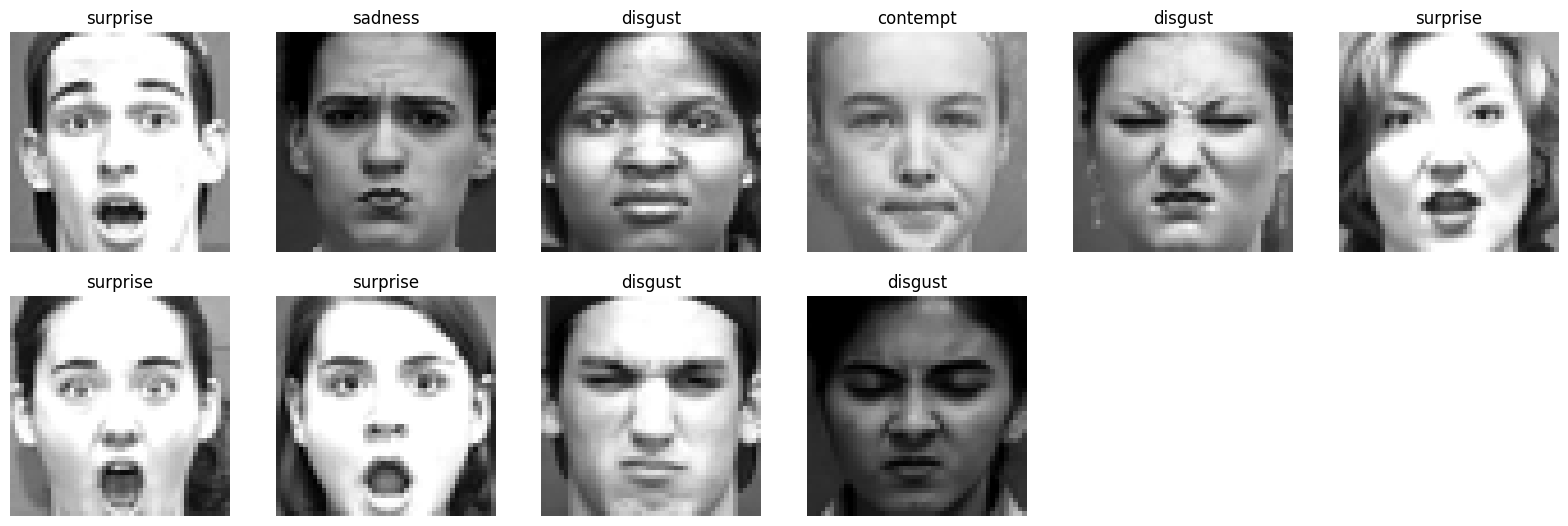

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
for i,j in enumerate(list(np.random.randint(0,len(x_img),10))):
  plt.subplot(6,6,i+1)
  plt.imshow(x_img[j])
  plt.axis('off')
  plt.title(names[list(y_img[j].astype(int)).index(1)])

# Build the CNN model

In [80]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPooling2D

def create_model():
  input_shape=(48,48,3)
  model=Sequential()
  model.add(Conv2D(6,(5,5), input_shape=input_shape, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(16,(5,5), padding='same', activation='relu'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dense(128,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(7,activation='softmax'))

  model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
  return model


**Create & Plot the deep learning model**

In [81]:
model=create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 6)         456       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 16)        2416      
                                                                 
 activation_2 (Activation)   (None, 24, 24, 16)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 12, 12, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)       

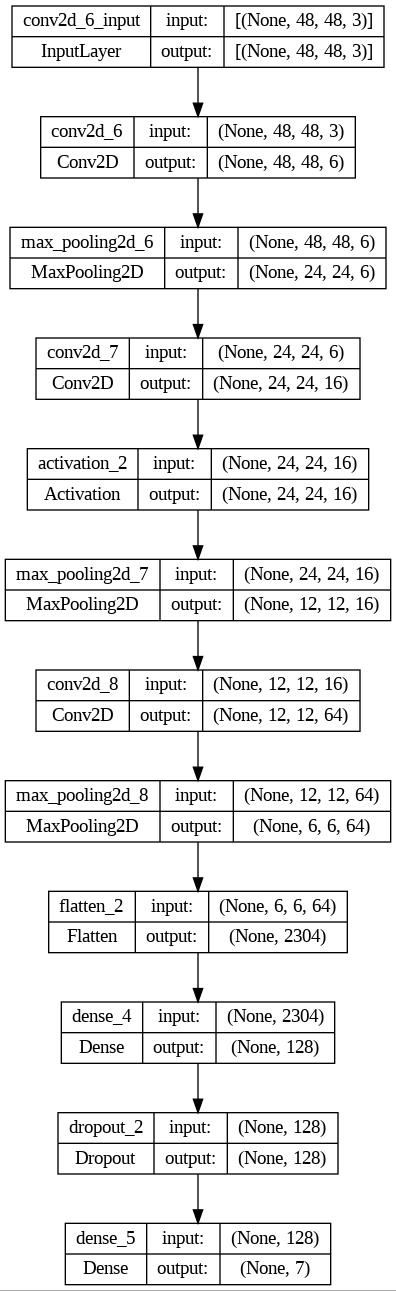

In [82]:
from keras.utils import plot_model

plot_model(model,'my_model.jpg',show_shapes=True)

**Train the model**

In [83]:
from keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint(filepath="model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')
call_back = [mc]

In [84]:
history=model.fit(x_train,y_train, epochs=200,validation_data=(x_test,y_test),callbacks=[mc])

Epoch 1/200
24/25 [===========================>..] - ETA: 0s - loss: 1.8146 - accuracy: 0.2773
Epoch 1: val_accuracy improved from -inf to 0.38071, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 4s 123ms/step - loss: 1.8094 - accuracy: 0.2793 - val_loss: 1.7607 - val_accuracy: 0.3807
Epoch 2/200
24/25 [===========================>..] - ETA: 0s - loss: 1.5818 - accuracy: 0.4414
Epoch 2: val_accuracy improved from 0.38071 to 0.49239, saving model to model.h5
25/25 [==============================] - 2s 80ms/step - loss: 1.5862 - accuracy: 0.4388 - val_loss: 1.4057 - val_accuracy: 0.4924
Epoch 3/200
25/25 [==============================] - ETA: 0s - loss: 1.1158 - accuracy: 0.6071
Epoch 3: val_accuracy improved from 0.49239 to 0.60406, saving model to model.h5
25/25 [==============================] - 2s 99ms/step - loss: 1.1158 - accuracy: 0.6071 - val_loss: 0.9317 - val_accuracy: 0.6041
Epoch 4/200
25/25 [==============================] - ETA: 0s - loss: 0.8705 - accuracy: 0.6888
Epoch 4: val_accuracy improved from 0.60406 to 0.75127, saving model to model.h5
25/25 [==============================] - 4s 140ms/step - loss: 0.8705 - accuracy:

# Testing

the accuracy of testing 100.000000
1/1 [==============================] - 0s 25ms/step
[[1 0 0 0 0 0 0]]
anger


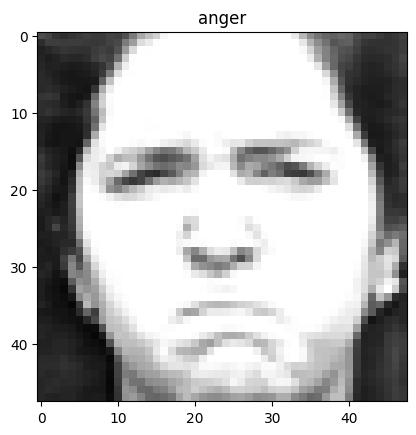

In [101]:
loss,score =model.evaluate(x_test,y_test,verbose=0)
print("the accuracy of testing %f" % (score*100))
def predict_sample(index):
  y_predict=model.predict(x_test[index:index+1])
  plt.imshow(x_test[index])
  print(y_predict.astype(int))
  plt.title(names[list(y_predict.astype(int).flatten()).index(1)])

num=195
predict_sample(num)
print(names[list(y_test[num]).index(1)])

**Do the comparaison & Plot the losses values**

<Figure size 640x480 with 0 Axes>

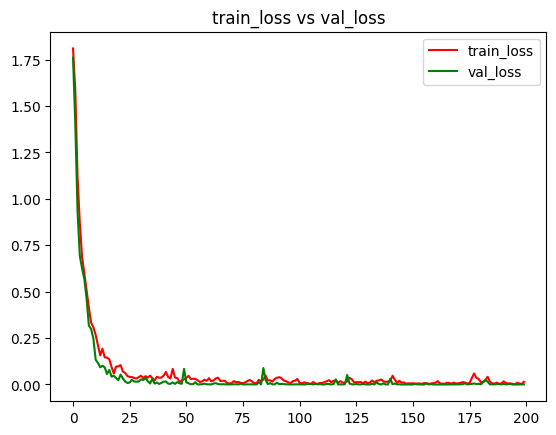

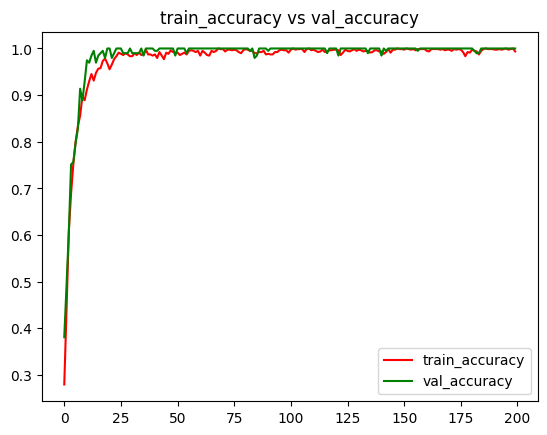

<Figure size 640x480 with 0 Axes>

In [102]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']

steps=range(len(train_loss))

plt.plot(steps,train_loss,'r',label='train_loss')
plt.plot(steps,val_loss,'g',label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(steps,train_accuracy,'r',label='train_accuracy')
plt.plot(steps,val_accuracy,'g',label='val_accuracy')
plt.title('train_accuracy vs val_accuracy')
plt.legend()
plt.figure()


